In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Task 1

In [3]:
#1.Load the dataset into a pandas dataframe.

In [6]:
df=pd.read_csv("DS3_C1_S2_Weather_Data_Practice.csv")
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


# 2.use the rolling average to achieve a smooth plot of the data.

In [7]:
Temperatur=df['Temp']
Temperatur

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64

In [8]:
decomposition=seasonal_decompose(Temperatur, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

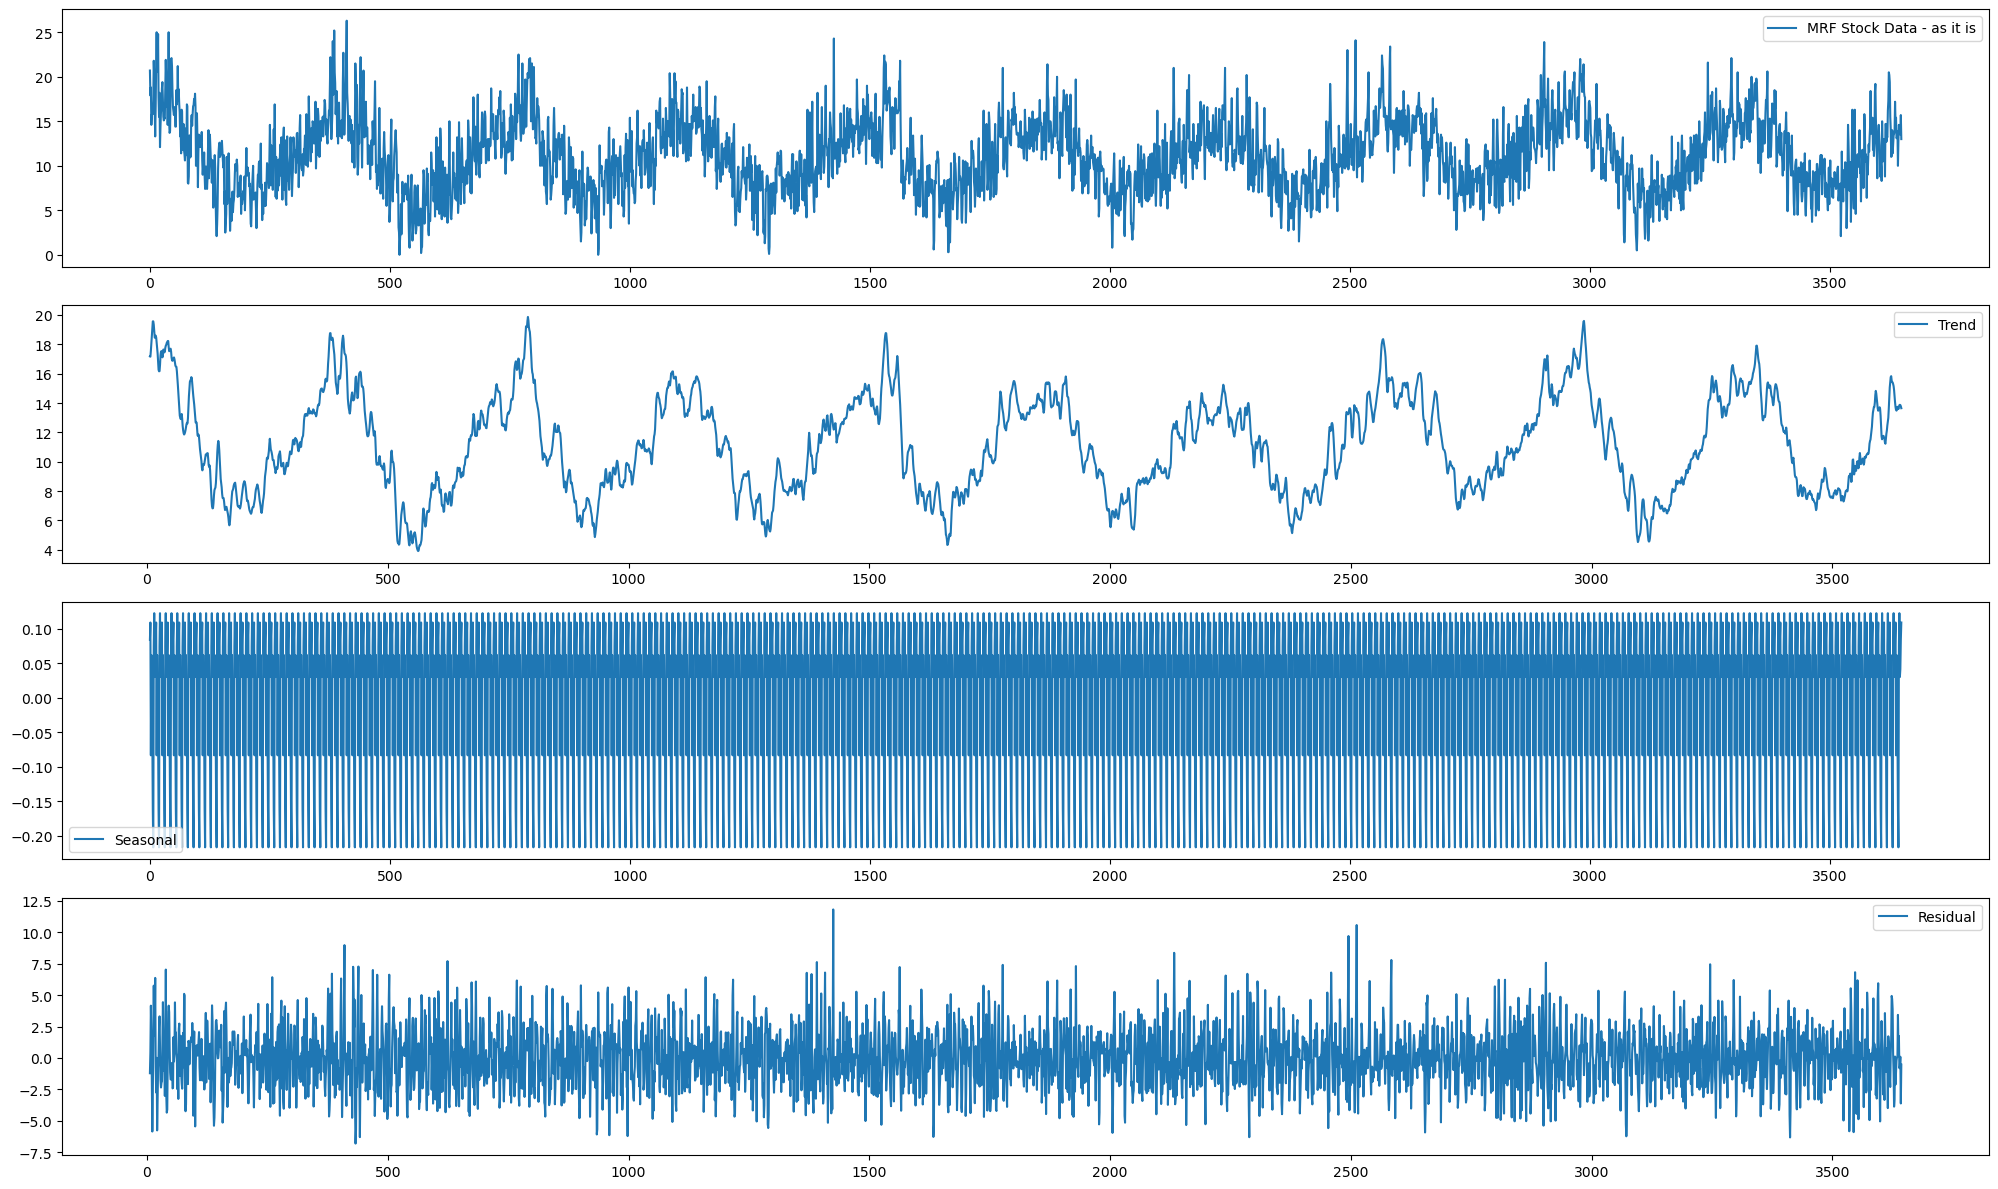

In [9]:
fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.subplot(411) 
plt.plot(Temperatur,label='MRF Stock Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In the above figure we can see the original series with different time series component. We can see the trend component in which there is a normal trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# Task 2

# Investigate whether the dataset contains any trend or seasonality.

In [5]:
Temperatur=df['Temp']
print(Temperatur)

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64


In [5]:
path="DS3_C1_S2_Weather_Data_Practice.csv"
elec_data = pd.read_csv(path,index_col='Date',parse_dates=True)
elec_data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


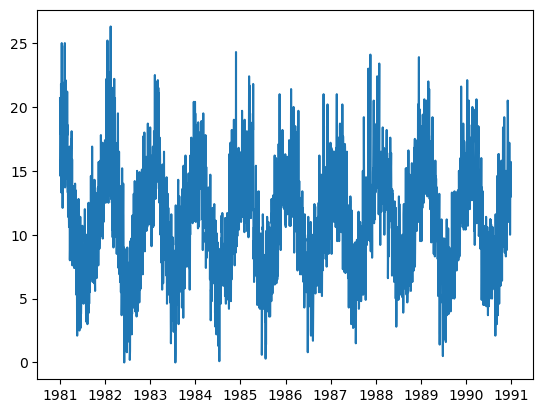

In [7]:
plt.plot(elec_data);

# Task 3: Check for Data Stationarity.

# Determine whether the data is stattionary. if not,make the data stationary with the process of differentiation.

In [13]:
def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [14]:
# function call
print(checkStationarity(mystock))

0.0002470826300360942
pvalue=0.0002470826300360942. Data is Stationary. Proceed to model building


In [15]:
diff_mystock = mystock - mystock.shift(2)
print(diff_mystock)

      Temp
0      NaN
1      NaN
2     -1.9
3     -3.3
4     -3.0
...    ...
3645   1.1
3646  -1.0
3647  -0.5
3648   2.1
3649  -0.5

[3650 rows x 1 columns]


In [16]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  3650
After removing Nulls, total records =  3648
      Temp
2     -1.9
3     -3.3
4     -3.0
5      1.2
6      0.0
...    ...
3645   1.1
3646  -1.0
3647  -0.5
3648   2.1
3649  -0.5

[3648 rows x 1 columns]


In [17]:
# check if the differenced data is stationary
checkStationarity(diff_mystock)

4.784181104042153e-29


'pvalue=4.784181104042153e-29. Data is Stationary. Proceed to model building'

Text(0.5, 1.0, 'Actual vs Differenced data')

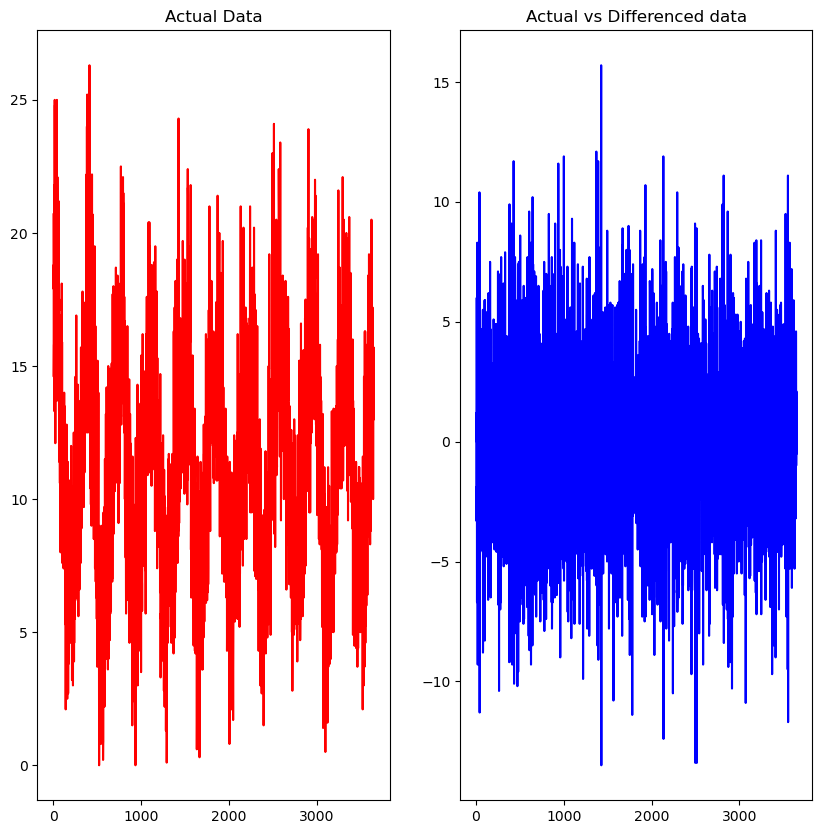

In [18]:
# plot the Actual data and Differenced data
ax = plt.subplots(figsize = (10,10))
plt.subplot(121)

plt.plot(mystock,color='red')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_mystock,color='blue')
plt.title('Differenced Data')

plt.title("Actual vs Differenced data")

In the above figure the Actual plot shows the trend in the data which makes the data Not stationary that means we can not proceed with the time series model. But after doing differencing we do not find the trend component in the plot which make the data stationary also indicate that we can now proceed with the time series model.

# Task 4: Smooth the data.

# Figure out the smoothing technique that works best for the dataset in order to forecast temperature.

In [8]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [9]:
data = df['Temp']

In [10]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

In [11]:
d_simple_exp

{0: 0       20.7
 1       20.7
 2       20.7
 3       20.7
 4       20.7
         ... 
 3645    20.7
 3646    20.7
 3647    20.7
 3648    20.7
 3649    20.7
 Name: forecast, Length: 3650, dtype: float64,
 0.2: 0       20.700000
 1       20.700000
 2       20.140000
 3       19.872000
 4       18.817600
           ...    
 3645    13.448916
 3646    13.559133
 3647    13.567306
 3648    13.553845
 3649    13.983076
 Name: forecast, Length: 3650, dtype: float64,
 0.6: 0       20.700000
 1       20.700000
 2       19.020000
 3       18.888000
 4       16.315200
           ...    
 3645    13.695645
 3646    13.878258
 3647    13.711303
 3648    13.584521
 3649    14.853809
 Name: forecast, Length: 3650, dtype: float64,
 0.8: 0       20.700000
 1       20.700000
 2       18.460000
 3       18.732000
 4       15.426400
           ...    
 3645    14.174191
 3646    14.034838
 3647    13.686968
 3648    13.537394
 3649    15.267479
 Name: forecast, Length: 3650, dtype: float64}

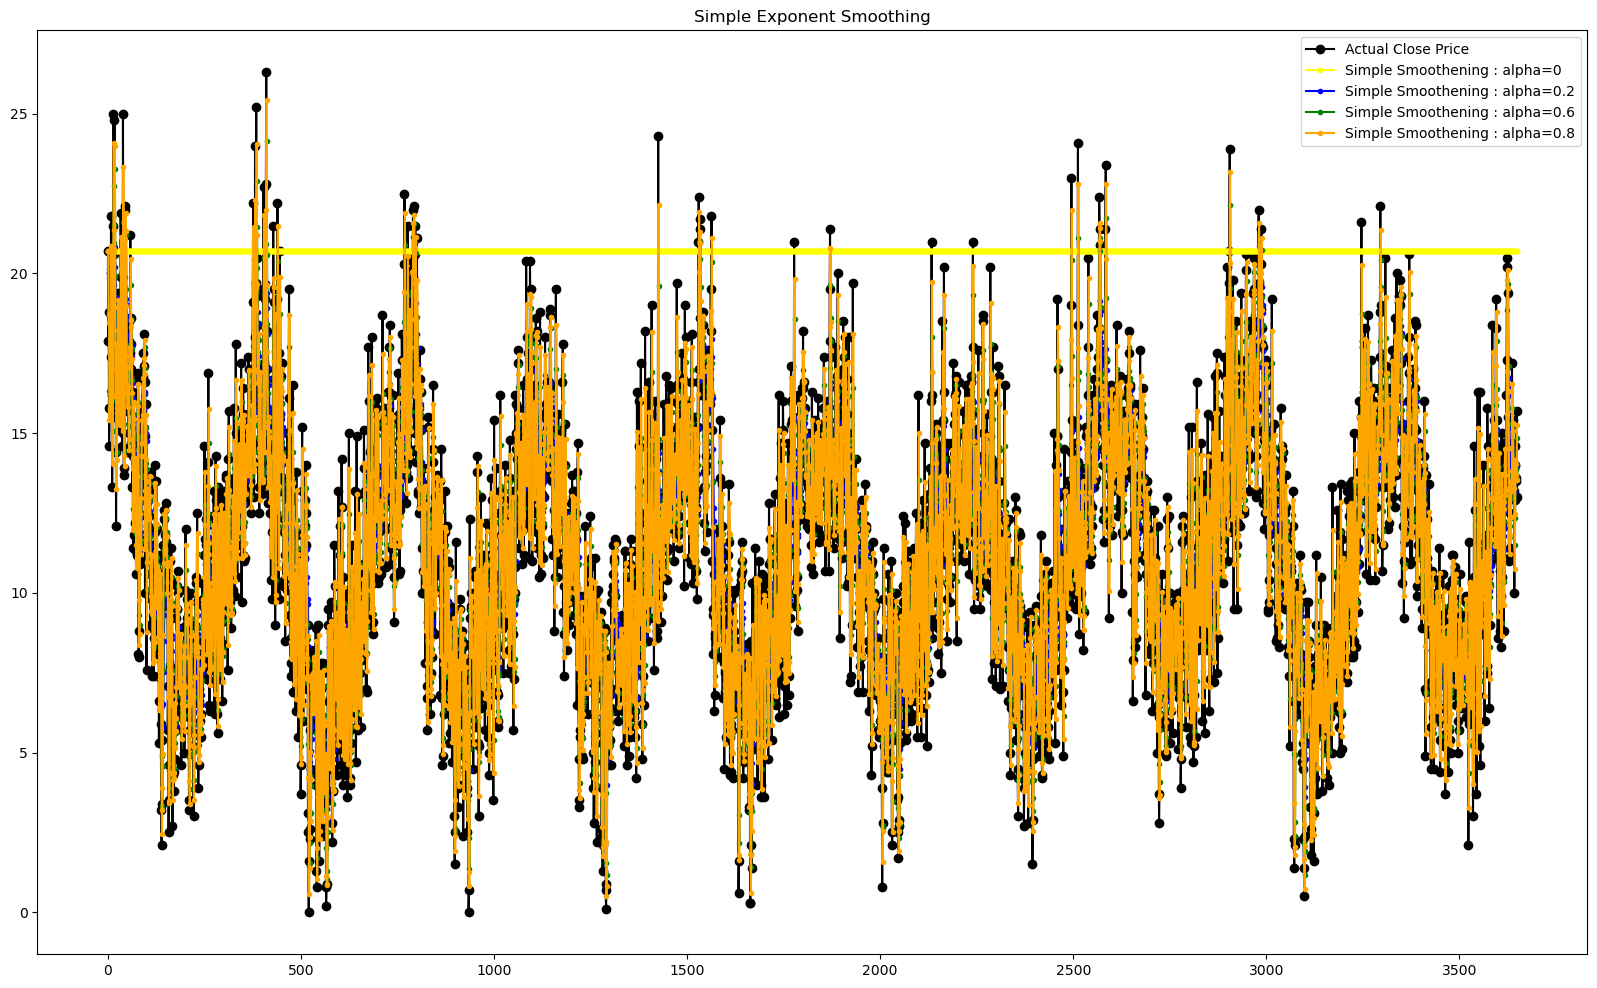

In [13]:
colors = ['yellow','blue','green','orange']
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Temperature')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

In the above time series plot using simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line than the other line with respect to actual Temperature line. This line adjust to the changing condition more smoothly.

# Double Exponents Smoothing (trend but no seasonality)

In [15]:
model=ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2,smoothing_seasonal=0.5)

In [17]:
f_dexp = model.fittedvalues
print(f_dexp)

0       17.996829
1       18.536308
2       18.407892
3       18.485158
4       17.706971
          ...    
3645    13.443140
3646    13.553357
3647    13.561531
3648    13.548069
3649    13.977300
Length: 3650, dtype: float64


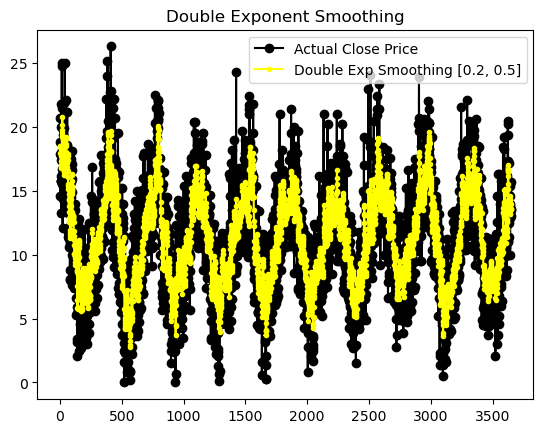

In [30]:
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.title('Double Exponent Smoothing')
plt.legend();

In the above Double exponential Smoothing plot we can see that time series smoothing constatnt from the data to optimize the fitness of line.

# Triple Exponents smoothing (Trend and Seasonality)

In [26]:
model=ExponentialSmoothing(data,trend='add',seasonal='add',seasonal_periods=365).fit()

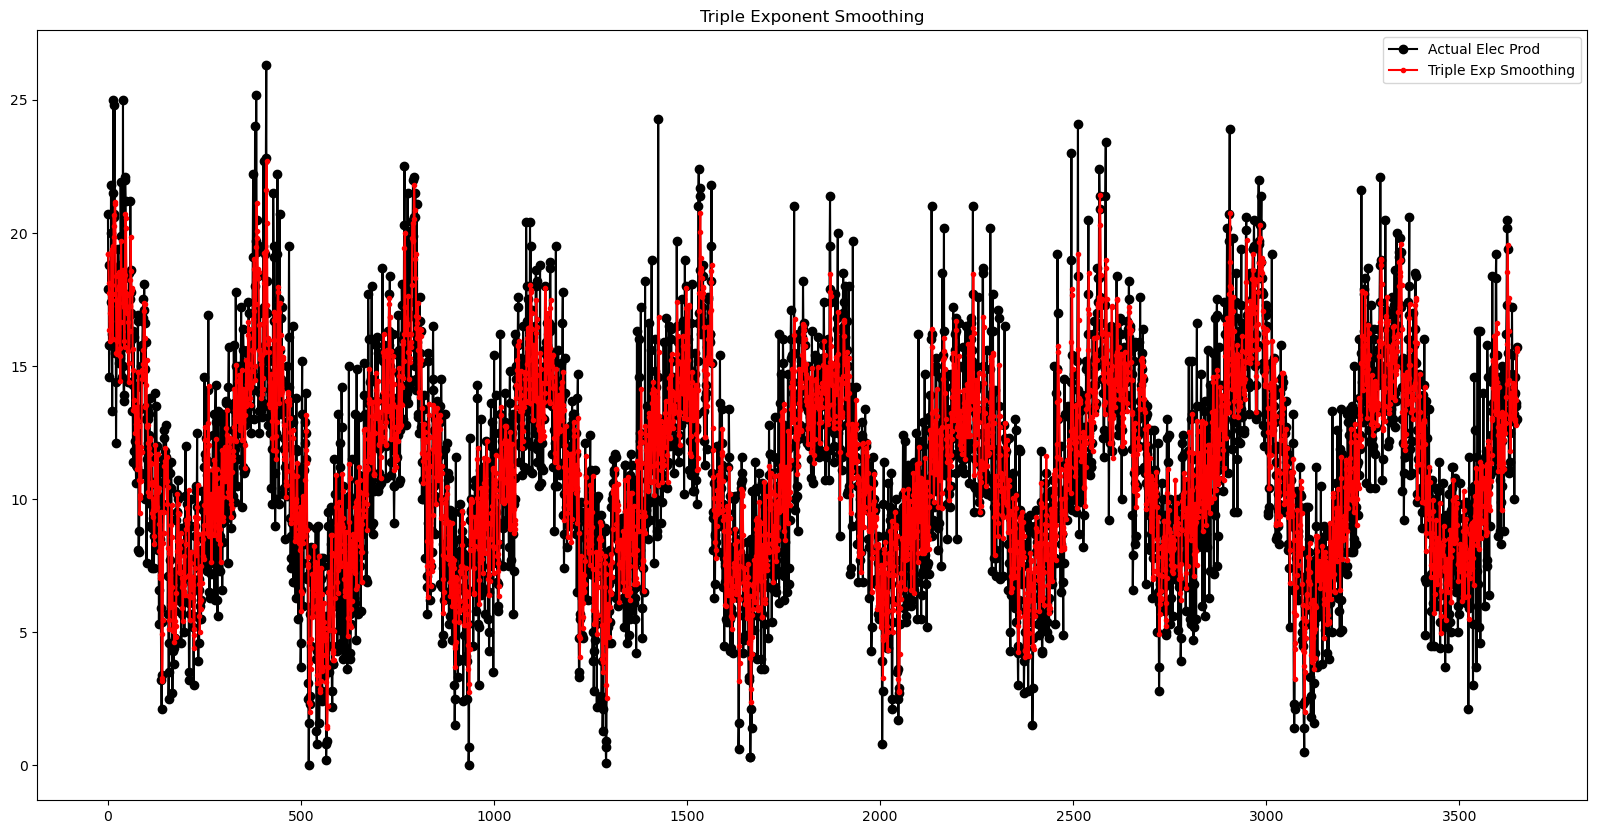

In [31]:
ax = plt.subplots(figsize = (20,10))
plt.plot(data, marker='o',color='black',label='Actual Elec Prod')
plt.plot(model.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.title('Triple Exponent Smoothing')
plt.legend();

In the above plot we can see the yearly seasonality with trend over the years. In this plot we can see the normal trend and yearly seasonality.